<a href="https://colab.research.google.com/github/Bishalpo/takeovds41/blob/main/Churn_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc


In [ ]:
churn_data1=pd.read_csv("/content/churn-bigml-20.csv")
churn_data1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [ ]:
churn_data2=pd.read_csv("/content/churn-bigml-80.csv")
churn_data2

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [ ]:
# Merging the datasets
churn_data = pd.concat([churn_data1, churn_data2], ignore_index=True)

# Checking for duplicates
duplicates = churn_data.duplicated().sum()

churn_data.shape, duplicates

((3333, 20), 0)

In [ ]:
churn_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3329,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [ ]:
churn_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
churn_data.info

<bound method DataFrame.info of      State  Account length  Area code International plan Voice mail plan  \
0       LA             117        408                 No              No   
1       IN              65        415                 No              No   
2       NY             161        415                 No              No   
3       SC             111        415                 No              No   
4       HI              49        510                 No              No   
...    ...             ...        ...                ...             ...   
3328    SC              79        415                 No              No   
3329    AZ             192        415                 No             Yes   
3330    WV              68        415                 No              No   
3331    RI              28        510                 No              No   
3332    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total d

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# Checking for missing values
missing_values = churn_data.isnull().sum()
missing_values_percentage = (missing_values / len(churn_data)) * 100

missing_values, missing_values_percentage

(State                     0
 Account length            0
 Area code                 0
 International plan        0
 Voice mail plan           0
 Number vmail messages     0
 Total day minutes         0
 Total day calls           0
 Total day charge          0
 Total eve minutes         0
 Total eve calls           0
 Total eve charge          0
 Total night minutes       0
 Total night calls         0
 Total night charge        0
 Total intl minutes        0
 Total intl calls          0
 Total intl charge         0
 Customer service calls    0
 Churn                     0
 dtype: int64,
 State                     0.0
 Account length            0.0
 Area code                 0.0
 International plan        0.0
 Voice mail plan           0.0
 Number vmail messages     0.0
 Total day minutes         0.0
 Total day calls           0.0
 Total day charge          0.0
 Total eve minutes         0.0
 Total eve calls           0.0
 Total eve charge          0.0
 Total night minutes       0.0
 T

In [ ]:
churn_data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
correlation_matrix = churn_data.corr()

<ipython-input-8-6fa1b2c0094b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn_data.corr()


<ipython-input-6-ec43d1488437>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = churn_data.corr()


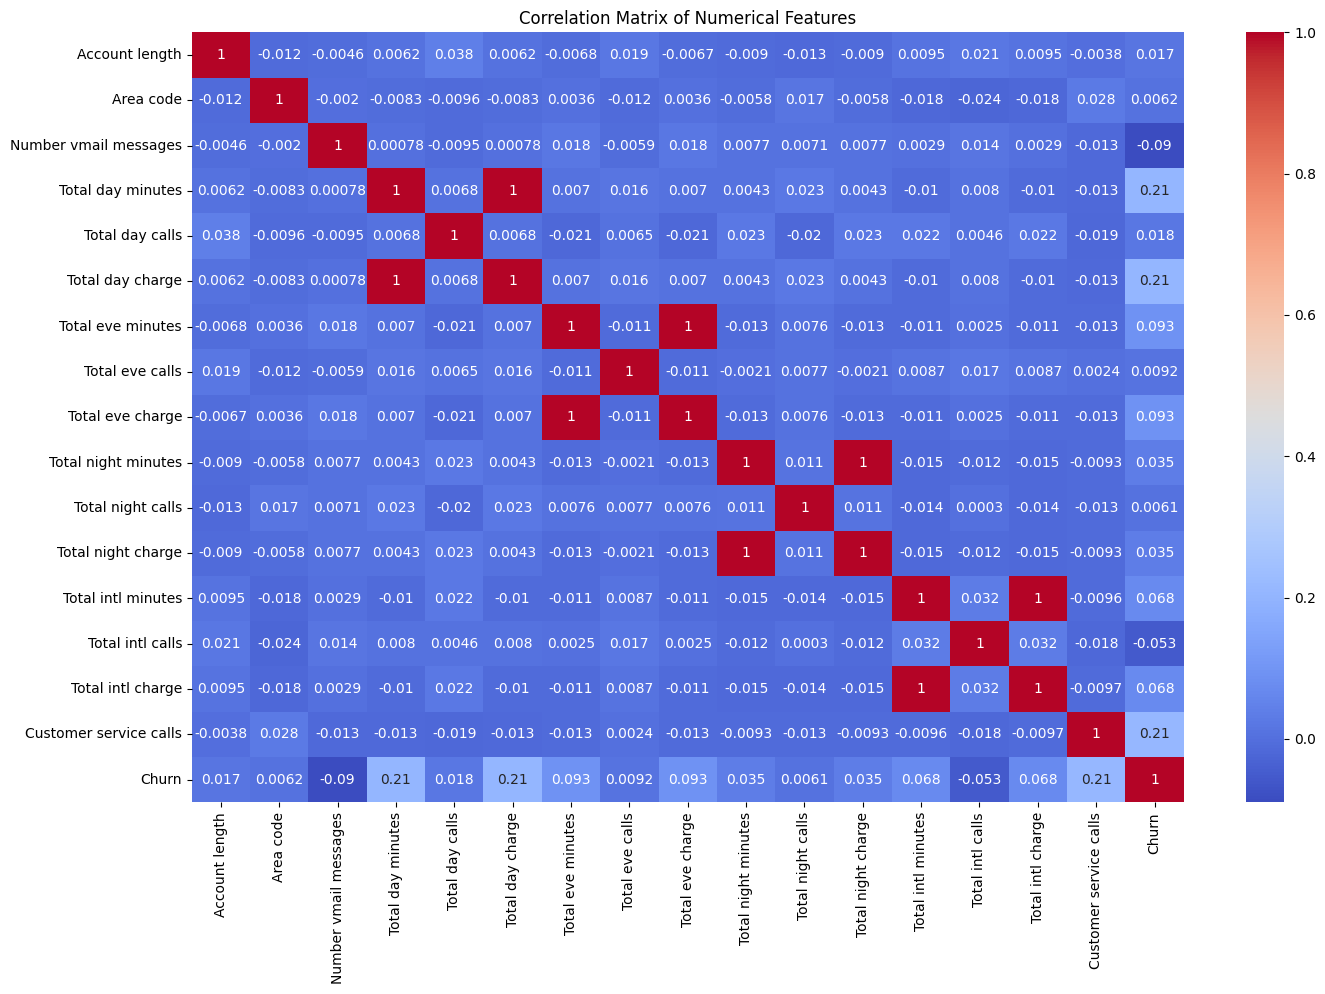

In [ ]:
# Correlation Analysis
correlation_matrix = churn_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

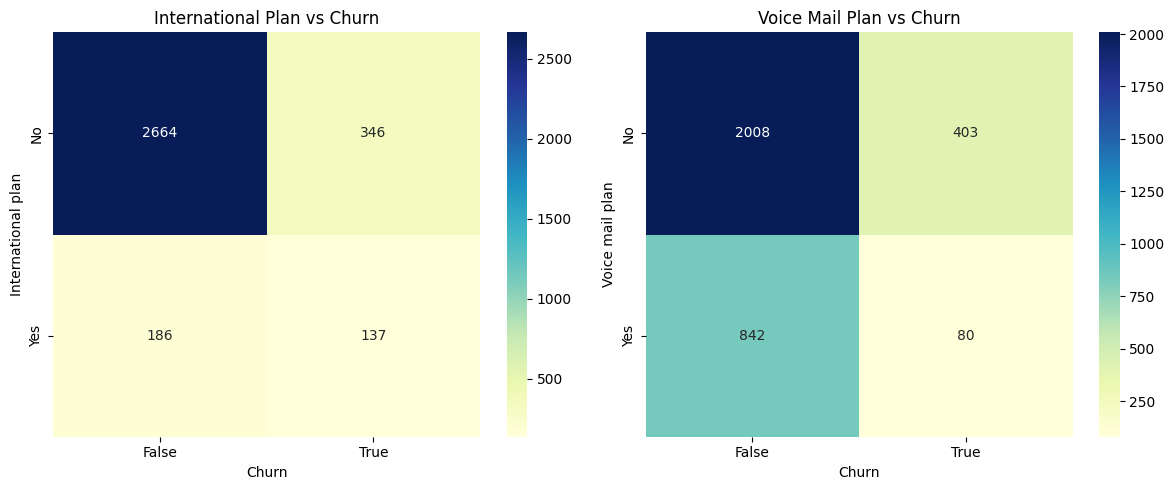

In [ ]:
# Analysis of Categorical Variables: State, International Plan, Voice Mail Plan

# International Plan vs Churn
intl_plan_churn = pd.crosstab(churn_data['International plan'], churn_data['Churn'])

# Voice Mail Plan vs Churn
vmail_plan_churn = pd.crosstab(churn_data['Voice mail plan'], churn_data['Churn'])

# Plotting the results
plt.figure(figsize=(12, 5))

# International Plan
plt.subplot(1, 2, 1)
sns.heatmap(intl_plan_churn, annot=True, fmt='d', cmap='YlGnBu')
plt.title('International Plan vs Churn')

# Voice Mail Plan
plt.subplot(1, 2, 2)
sns.heatmap(vmail_plan_churn, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Voice Mail Plan vs Churn')

plt.tight_layout()
plt.show()

<ipython-input-11-47659a4d9ccc>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usage_patterns = churn_data.groupby('Churn').mean()[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']]


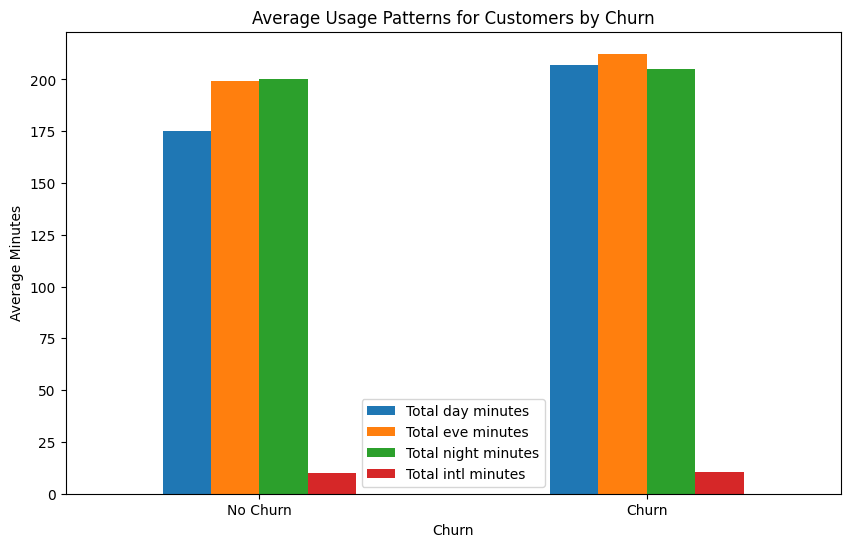

In [ ]:
# Analyzing Customer Usage Patterns in relation to Churn

# Grouping the data by 'Churn' and calculating the mean for usage patterns
usage_patterns = churn_data.groupby('Churn').mean()[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']]

# Plotting the usage patterns
usage_patterns.plot(kind='bar', figsize=(10, 6))
plt.title('Average Usage Patterns for Customers by Churn')
plt.ylabel('Average Minutes')
plt.xlabel('Churn')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'], rotation=0)
plt.show()

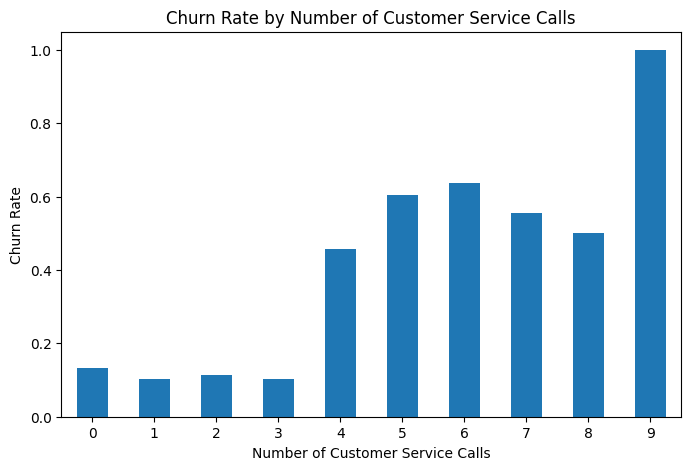

In [ ]:
# Detailed Analysis of Customer Service Calls

# Grouping by the number of customer service calls and calculating the churn rate
service_calls_churn = churn_data.groupby('Customer service calls')['Churn'].mean()

# Plotting the results
plt.figure(figsize=(8, 5))
service_calls_churn.plot(kind='bar')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.xlabel('Number of Customer Service Calls')
plt.xticks(rotation=0)
plt.show()

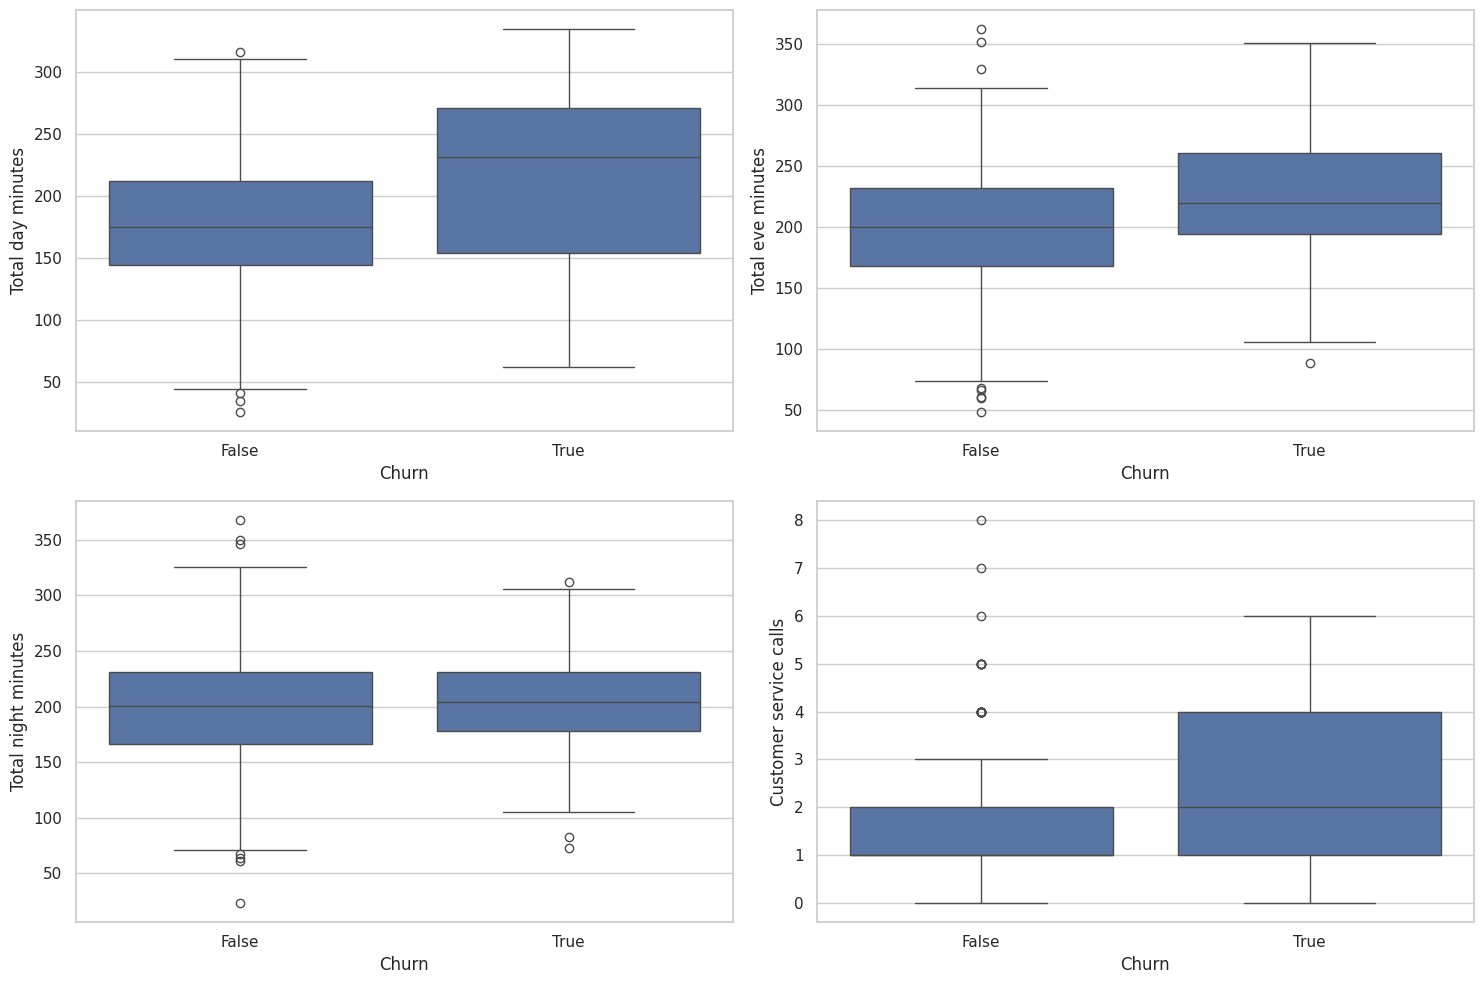

False    2850
True      483
Name: Churn, dtype: int64

In [ ]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of the 'Churn' variable
churn_distribution = churn_data['Churn'].value_counts()

# Relationship between 'Churn' and other features
# For this,looking at some key features like 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', and 'Customer service calls'

plt.figure(figsize=(15, 10))

# Total day minutes vs Churn
plt.subplot(2, 2, 1)
sns.boxplot(x='Churn', y='Total day minutes', data=churn_data1)

# Total eve minutes vs Churn
plt.subplot(2, 2, 2)
sns.boxplot(x='Churn', y='Total eve minutes', data=churn_data1)

# Total night minutes vs Churn
plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='Total night minutes', data=churn_data1)

# Customer service calls vs Churn
plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='Customer service calls', data=churn_data1)

plt.tight_layout()
plt.show()

churn_distribution

The Exploratory Data Analysis (EDA):

Churn Distribution: There are 572 customers who have not churned and 95 who have. This indicates an imbalanced dataset with a smaller proportion of churned customers.

Total Day Minutes vs. Churn: Customers who churn tend to use more day minutes on average compared to those who do not churn. This could indicate higher usage or possibly dissatisfaction with day calling rates or services.

Customer Service Calls vs. Churn: There is a noticeable difference here. Customers who churn tend to have made more customer service calls compared to those who haven’t churned. This could be indicative of issues not being resolved to the customer's satisfaction.

In [ ]:
churn_data['Total day minutes bin'] = pd.qcut(churn_data['Total day minutes'], 4, labels=False)

# Encoding categorical variables
categorical_features = ['State', 'International plan', 'Voice mail plan']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Normalizing continuous variables
numeric_features = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total eve minutes',
                    'Total night minutes', 'Total intl minutes', 'Total day calls', 'Total eve calls',
                    'Total night calls', 'Total intl calls', 'Customer service calls', 'Total day minutes bin']
numeric_transformer = StandardScaler()

# Combining transformations into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformations
data_preprocessed = preprocessor.fit_transform(churn_data)

# Checking the shape of the processed data
data_preprocessed.shape

(3333, 67)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid multicollinearity
categorical_columns = ['State', 'International plan', 'Voice mail plan']
encoded_categorical = onehot_encoder.fit_transform(churn_data[categorical_columns])

# Convert encoded data into a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical,
                                      columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Drop the original categorical columns and add the new encoded columns
data_preprocessed = churn_data.drop(categorical_columns, axis=1)
data_preprocessed = pd.concat([data_preprocessed, encoded_categorical_df], axis=1)

# Convert boolean 'Churn' column to integer
data_preprocessed['Churn'] = data_preprocessed['Churn'].astype(int)

# Displaying the first few rows of the preprocessed dataset
data_preprocessed.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_preprocessed

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.5,97,31.37,351.6,80,29.89,215.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161,415,0,332.9,67,56.59,317.8,97,27.01,160.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,111,415,0,110.4,103,18.77,137.3,102,11.67,189.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49,510,0,119.3,117,20.28,215.1,109,18.28,178.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,79,415,0,134.7,98,22.90,189.7,68,16.12,221.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3329,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3330,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3331,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Feature Engineering: Creating new features or transforming existing ones
# For simplicity, let's create a new feature that is a total of all charges
data_preprocessed['Total charge'] = data_preprocessed['Total day charge'] + data_preprocessed['Total eve charge'] + data_preprocessed['Total night charge'] + data_preprocessed['Total intl charge']

# Updating the features and target variable
X = data_preprocessed.drop('Churn', axis=1)
y = data_preprocessed['Churn']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with Cross-Validation for hyperparameter tuning
log_reg_cv = LogisticRegressionCV(cv=5, random_state=42, scoring='accuracy')
log_reg_cv.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred_log_reg_cv = log_reg_cv.predict(X_test_scaled)

# Evaluating the model
accuracy_log_reg_cv = accuracy_score(y_test, y_pred_log_reg_cv)
report_log_reg_cv = classification_report(y_test, y_pred_log_reg_cv)
conf_matrix_log_reg_cv = confusion_matrix(y_test, y_pred_log_reg_cv)
roc_auc_log_reg_cv = roc_auc_score(y_test, y_pred_log_reg_cv)

accuracy_log_reg_cv, report_log_reg_cv, conf_matrix_log_reg_cv, roc_auc_log_reg_cv


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8695652173913043,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.97      0.93       571\n           1       0.60      0.27      0.37        96\n\n    accuracy                           0.87       667\n   macro avg       0.75      0.62      0.65       667\nweighted avg       0.85      0.87      0.85       667\n',
 array([[554,  17],
        [ 70,  26]]),
 0.620530502043199)

In [ ]:
# Predicting churn probabilities
y_pred_prob = log_reg_cv.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class (churn)

# Evaluating different thresholds
thresholds = np.linspace(0, 1, 100)
scores = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_prob >= thresh).astype(int)
    scores.append({
        'threshold': thresh,
        'accuracy': accuracy_score(y_test, y_pred_thresh),
        'precision': precision_score(y_test, y_pred_thresh, zero_division=0),
        'recall': recall_score(y_test, y_pred_thresh),
        'f1_score': f1_score(y_test, y_pred_thresh, zero_division=0)
    })

# Converting scores to DataFrame for analysis
scores_df = pd.DataFrame(scores)

# Finding the threshold with the best balance between recall and precision for churn
optimal_threshold = scores_df.loc[scores_df['f1_score'].idxmax()]

optimal_threshold

threshold    0.202020
accuracy     0.820090
precision    0.424051
recall       0.697917
f1_score     0.527559
Name: 20, dtype: float64

In [ ]:
# Reclassifying predictions with the new threshold
optimal_thresh = optimal_threshold['threshold']
y_pred_optimal = (y_pred_prob >= optimal_thresh).astype(int)

# Detailed evaluation with the new threshold
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal, zero_division=0)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_score_optimal = f1_score(y_test, y_pred_optimal, zero_division=0)
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)

accuracy_optimal, precision_optimal, recall_optimal, f1_score_optimal, conf_matrix_optimal


(0.8200899550224887,
 0.4240506329113924,
 0.6979166666666666,
 0.5275590551181103,
 array([[480,  91],
        [ 29,  67]]))

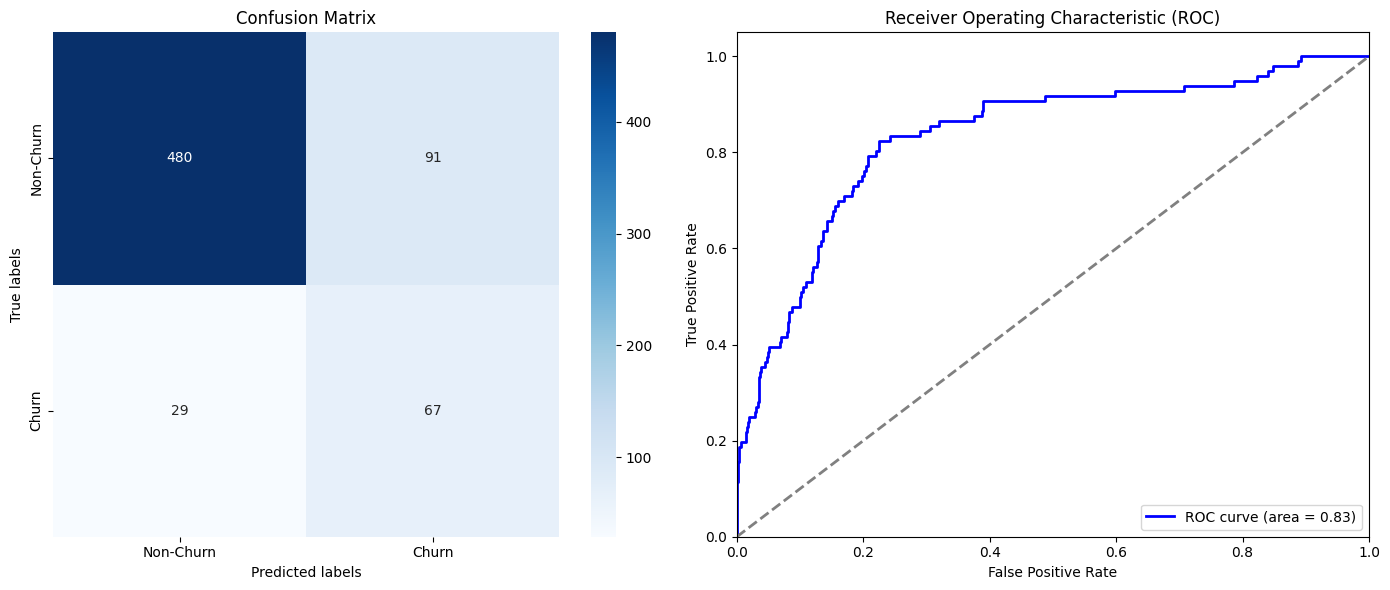

In [ ]:
# Plotting the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')
ax[0].xaxis.set_ticklabels(['Non-Churn', 'Churn'])
ax[0].yaxis.set_ticklabels(['Non-Churn', 'Churn'])

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

ax[1].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic (ROC)')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()